# CODING TASK #1: IMPORT KEY LIBRARIES AND DATASETS

In [222]:
# Import key libraries and datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
# Note that you might need to upgrade Seaborn library
# You will need to restart the notebook again for the changes to take effect
!pip install --upgrade Seaborn


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [224]:
# read the data using Pandas 
icecream_sales_df = pd.read_csv('IceCreamData.csv')

In [225]:
# View the DataFrame
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [226]:
icecream_sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [227]:
icecream_sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [228]:
# Note that we are using AWS SageMaker 2.72.1
# We will be using the new SageMaker 2.x SDK 
!pip list

Package                              Version
------------------------------------ -----------------
aiobotocore                          2.4.2
aiohttp                              3.8.5
aioitertools                         0.11.0
aiosignal                            1.3.1
alabaster                            0.7.12
anaconda-client                      1.7.2
anaconda-project                     0.8.3
ansi2html                            1.8.0
anyio                                3.7.1
argh                                 0.26.2
argon2-cffi                          23.1.0
argon2-cffi-bindings                 21.2.0
asn1crypto                           1.3.0
astroid                              2.15.6
astropy                              4.3.1
async-timeout                        4.0.3
asynctest                            0.13.0
atomicwrites                         1.3.0
attrs                                23.1.0
autopep8                             1.4.4
autovizwidget                   

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

In [229]:
icecream_sales_df.head(9)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338


In [230]:
icecream_sales_df.tail(9)

,Temperature,Revenue
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


# CODING TASK #2: EXPLORE THE DATA

In [231]:
icecream_sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [232]:
# Apply the describe method to obtain a statistical summary about your data
icecream_sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

In [233]:
icecream_sales_df['Revenue'].min()

10.0

In [234]:
icecream_sales_df.sort_values('Revenue').iloc[0,1]

10.0

In [235]:
icecream_sales_df.sort_values('Temperature', ascending=False).iloc[0,1]

1000.0

# CODING TASK #3: PERFORM DATA VISUALIZATION 

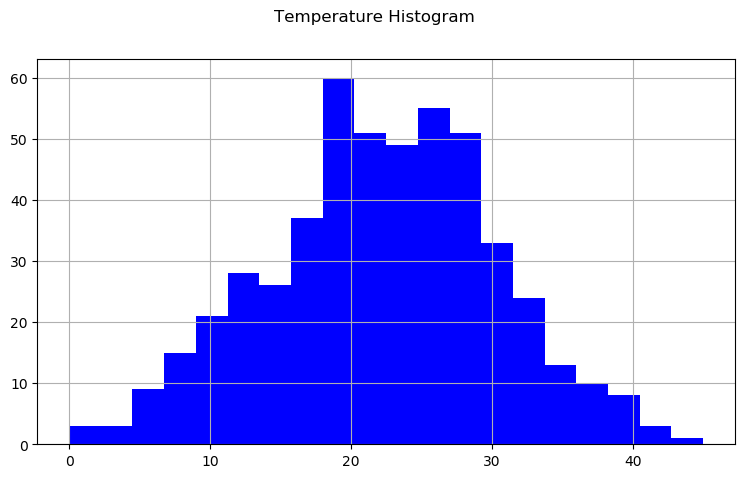

In [236]:
fig_1 = plt.figure();
icecream_sales_df['Temperature'].hist(bins = 20, figsize = (9, 5), color = 'b');
fig_1.suptitle('Temperature Histogram');
plt.show()

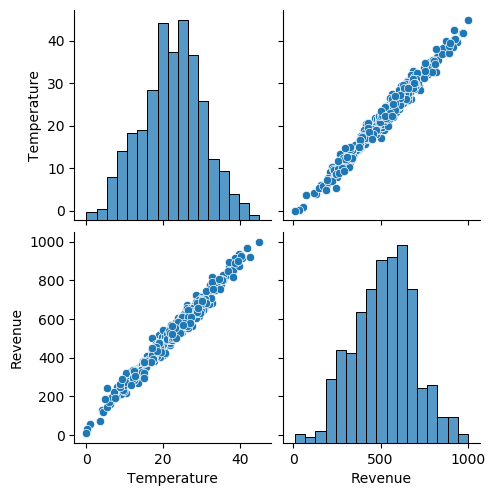

In [237]:
# plot pairplot
sns.pairplot(icecream_sales_df);
plt.show()

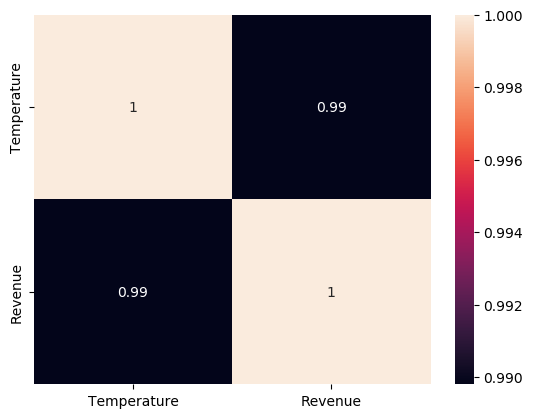

In [238]:
# PLot the correlation Matrix
corr_matrix = icecream_sales_df.corr()
sns.heatmap(corr_matrix, annot = True);
plt.show()

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

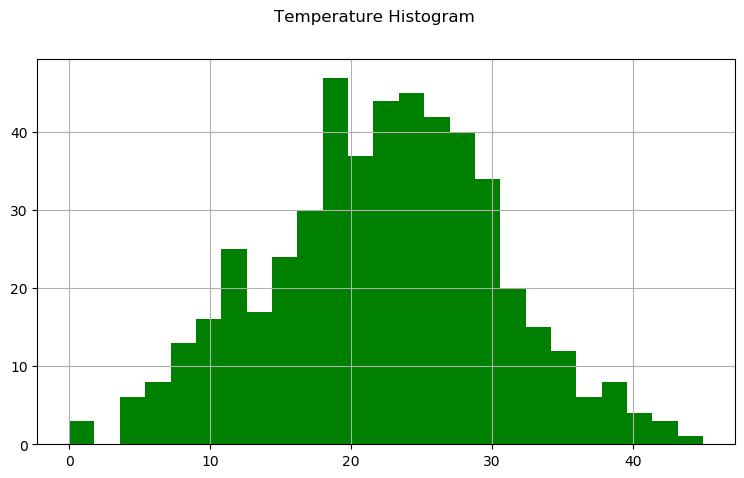

In [239]:
fig_2 = plt.figure();
icecream_sales_df['Temperature'].hist(bins = 25, figsize = (9, 5), color = 'g');
fig_2.suptitle('Temperature Histogram');
plt.show()

# CODING TASK #4: PREPARE THE DATA FOR MODEL TRAINING

In [240]:
# Separate the data into input X and Output y
X = icecream_sales_df[['Temperature']]
y = icecream_sales_df[['Revenue']]

In [241]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [242]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [243]:
# Check out the shape of the input
X.shape

(500, 1)

In [244]:
# Check out the shape of the output
y.shape

(500, 1)

In [245]:
# Convert the datatype to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [246]:
# Only take the numerical variables and scale them
X 

array([[24.566885 ],
       [26.005192 ],
       [27.790554 ],
       [20.595335 ],
       [11.503498 ],
       [14.352514 ],
       [13.70778  ],
       [30.833984 ],
       [ 0.97687  ],
       [31.669464 ],
       [11.455254 ],
       [ 3.6646695],
       [18.811825 ],
       [13.624509 ],
       [39.53991  ],
       [18.48314  ],
       [25.935375 ],
       [42.51528  ],
       [29.589481 ],
       [21.775948 ],
       [25.457836 ],
       [15.214569 ],
       [22.619316 ],
       [16.25872  ],
       [23.881725 ],
       [18.9783   ],
       [15.661465 ],
       [29.185045 ],
       [19.02461  ],
       [35.12015  ],
       [24.183937 ],
       [15.23119  ],
       [ 8.790953 ],
       [18.233229 ],
       [35.628925 ],
       [37.05754  ],
       [22.28455  ],
       [17.517075 ],
       [31.737919 ],
       [17.049738 ],
       [23.003489 ],
       [ 8.755554 ],
       [18.775358 ],
       [14.109661 ],
       [18.633913 ],
       [15.676487 ],
       [20.947914 ],
       [30.63

In [247]:
y

array([[ 534.799  ],
       [ 625.1901 ],
       [ 660.63226],
       [ 487.70697],
       [ 316.2402 ],
       [ 367.94073],
       [ 308.89453],
       [ 696.7166 ],
       [  55.39034],
       [ 737.80084],
       [ 325.9684 ],
       [  71.16016],
       [ 467.44672],
       [ 289.54092],
       [ 905.4776 ],
       [ 469.90903],
       [ 648.21   ],
       [ 921.5083 ],
       [ 649.56116],
       [ 534.62286],
       [ 612.15393],
       [ 353.32562],
       [ 524.23615],
       [ 374.23114],
       [ 523.1246 ],
       [ 473.60434],
       [ 402.45532],
       [ 679.3178 ],
       [ 517.53406],
       [ 809.67206],
       [ 528.38043],
       [ 356.09802],
       [ 237.76392],
       [ 418.13727],
       [ 809.46344],
       [ 870.7659 ],
       [ 550.2785 ],
       [ 405.66144],
       [ 740.93567],
       [ 501.733  ],
       [ 539.688  ],
       [ 242.2362 ],
       [ 421.6215 ],
       [ 358.00284],
       [ 467.63107],
       [ 396.93564],
       [ 500.92508],
       [ 651.

In [248]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [249]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [250]:
X_train.shape[0] ==  X.shape[0]*.7

True

# CODING TASK #5: TRAIN A SIMPLE LINEAR REGRESSION MODEL USING SCIKIT LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [251]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.980503388413525

In [253]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[21.446533]]
Linear Model Coefficient (b):  [43.456177]


**PRACTICE OPPORTUNITY #5 [OPTIONAL]:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [254]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn_new = LinearRegression(fit_intercept = False)
regresssion_model_sklearn_new.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [255]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn_new.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9720854572745998

In [256]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn_new.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn_new.intercept_)

Linear Model Coefficient (m):  [[23.18277]]
Linear Model Coefficient (b):  0.0


# CODING TASK #6: ASSESS TRAINED MODEL PERFORMANCE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [257]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [258]:
y_predict

array([[691.7442  ],
       [351.45895 ],
       [657.5505  ],
       [438.92984 ],
       [513.1893  ],
       [147.8123  ],
       [743.3179  ],
       [568.30505 ],
       [787.18005 ],
       [157.28381 ],
       [639.2516  ],
       [456.68338 ],
       [782.76465 ],
       [491.6612  ],
       [200.77605 ],
       [169.0997  ],
       [464.2942  ],
       [450.6245  ],
       [669.3742  ],
       [736.122   ],
       [492.43094 ],
       [183.77043 ],
       [407.0774  ],
       [282.2141  ],
       [575.7324  ],
       [796.6617  ],
       [711.7308  ],
       [444.6881  ],
       [629.22125 ],
       [621.58435 ],
       [481.20206 ],
       [608.2947  ],
       [544.21204 ],
       [549.402   ],
       [653.8147  ],
       [604.6875  ],
       [641.538   ],
       [253.25433 ],
       [521.9515  ],
       [955.2616  ],
       [482.5438  ],
       [582.02295 ],
       [727.4176  ],
       [660.90405 ],
       [518.41785 ],
       [454.63007 ],
       [621.7452  ],
       [205.6

<Figure size 640x480 with 0 Axes>

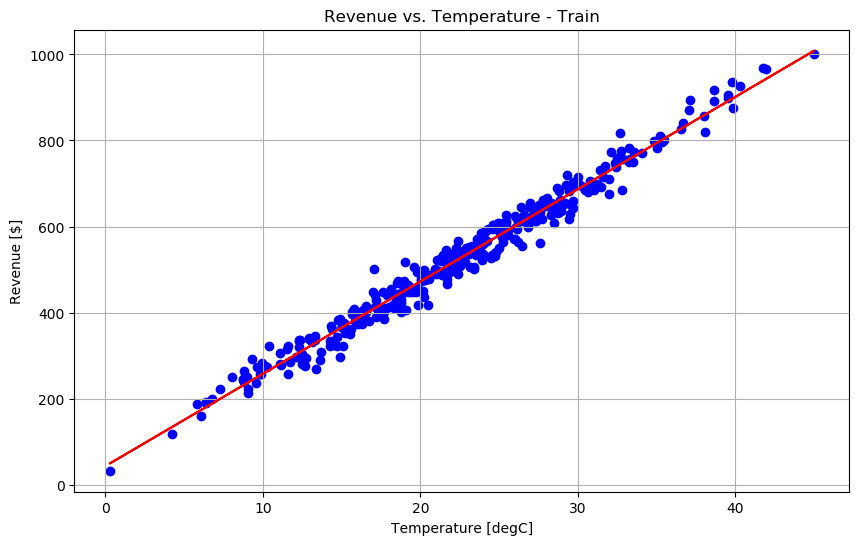

In [259]:
fig_3 = plt.figure();
plt.figure(figsize = (10, 6))
plt.scatter(X_train, y_train, color = 'b')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature - Train')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

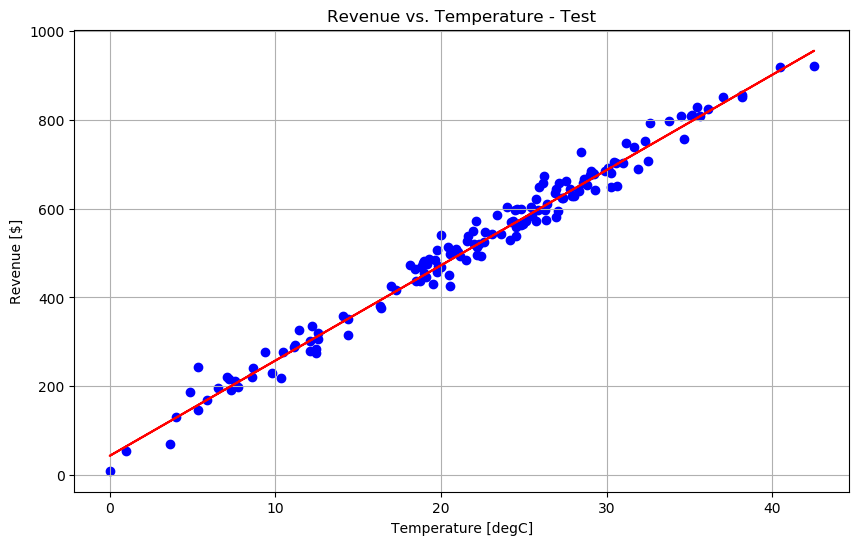

In [260]:
fig_4 = plt.figure();
plt.figure(figsize = (10, 6))
plt.scatter(X_test, y_test, color = 'b')
plt.plot(X_test, regresssion_model_sklearn.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue vs. Temperature - Test')
plt.grid()
plt.show()

**PRACTICE OPPORTUNITY #6 [OPTIONAL]:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [261]:
temperature = [[10]]
revenue = regresssion_model_sklearn.predict(temperature)
revenue

array([[257.92150879]])

In [262]:
temperature = [[35]]
revenue = regresssion_model_sklearn.predict(temperature)
revenue

array([[794.08483887]])

# GREAT JOB! 

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
 - **Use head and tail methods to print the first and last 9 rows of the dataframe**

In [263]:
icecream_sales_df.head(9)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338


In [264]:
icecream_sales_df.tail(9)

,Temperature,Revenue
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


**PRACTICE OPPORTUNITY #2 SOLUTION:**
 - **Find the minimimum revenue in the dataframe using two different methods**
 - **What is the revenue corresponding to maximum temperature?**

In [265]:
icecream_sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [266]:
icecream_sales_df['Revenue'].min()

10.0

In [267]:
icecream_sales_df[icecream_sales_df ['Temperature'] == icecream_sales_df['Temperature'].max()]

,Temperature,Revenue
444,45.0,1000.0


**PRACTICE OPPORTUNITY #3 SOLUTION:**
 - **Plot the histogram of the sales revenue using 25 bins**
 - **Set the histogram color to green**

In [268]:
fig = plt.figure();
icecream_sales_df['Revenue'].hist(bins = 25, figsize = (12, 7), color = 'g');
fig.suptitle('Sales Revenue Histogram');

**PRACTICE OPPORTUNITY #4 SOLUTION:**
 - **Split the data into 70% for training and the rest for testing**
 - **Verify that the split was successful**

In [269]:
# split the data into training and testing using SkLearn Library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [270]:
X_train.shape

(350, 1)

In [271]:
X_test.shape

(150, 1)

In [272]:
y_train.shape

(350, 1)

In [273]:
y_test.shape

(150, 1)

In [274]:
X_train

array([[10.245058 ],
       [22.482798 ],
       [28.790102 ],
       [24.48491  ],
       [16.020975 ],
       [11.455254 ],
       [ 3.9865232],
       [23.577114 ],
       [28.046404 ],
       [30.081089 ],
       [27.72144  ],
       [27.516645 ],
       [23.056213 ],
       [17.658503 ],
       [25.37411  ],
       [28.82976  ],
       [39.859398 ],
       [41.924446 ],
       [13.3306055],
       [39.76413  ],
       [24.585909 ],
       [15.661465 ],
       [31.579988 ],
       [10.119737 ],
       [10.096644 ],
       [10.326389 ],
       [21.488176 ],
       [25.995993 ],
       [12.901773 ],
       [21.775948 ],
       [19.066591 ],
       [35.628925 ],
       [19.849241 ],
       [16.406021 ],
       [23.424646 ],
       [24.528852 ],
       [24.308296 ],
       [24.818754 ],
       [21.601892 ],
       [22.1712   ],
       [35.21724  ],
       [22.28455  ],
       [33.235672 ],
       [23.003489 ],
       [23.963879 ],
       [12.43314  ],
       [27.790554 ],
       [22.67

**PRACTICE OPPORTUNITY #5 SOLUTION:**
- **Retrain the model while setting the fit_intercept = False, what do you notice?**

In [275]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = False)
regresssion_model_sklearn.fit(X_train, y_train)

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[23.21217]]
Linear Model Coefficient (b):  0.0


**PRACTICE OPPORTUNITY #6 SOLUTION:**
- **Use the trained model, obtain the revenue when the outside air temperature is 35 degC and 10 degC?**
- **Perform a sanity check to examine if these results make sense!**

In [276]:
temperature = [[10]]
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

temperature = [[35]] 
revenue = regresssion_model_sklearn.predict(temperature)
print(revenue)

[[232.12169647]]
[[812.42593765]]
